In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import random
import warnings
warnings.filterwarnings('ignore')

In [9]:
train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\1046942481.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(train_graph))


DiGraph with 1780768 nodes and 7550015 edges


In [10]:
df_train=pd.read_csv('FB_train_featurization.csv')
df_train.head()

,Unnamed: 0,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,hits_s,hits_d,jaccard_for_followees,jaccard_for_followers,cosine_for_followees,cosine_for_followers,same_coummunity,Adar_index,follows_back,shortest_path
0,0,1443525,1177229,1,37,11,0,0,0,0,...,9.536818e-13,4.565034e-11,0.019608,0,0,0,1,0.480126,1,2
1,1,582845,818904,1,4,2,0,0,0,0,...,2.834183e-17,9.197072e-14,0.000000,0,0,0,1,0.000000,1,9
2,2,764111,1729045,1,20,23,0,0,0,0,...,1.558661e-13,1.139772e-14,0.000000,0,0,0,1,0.000000,1,5
3,3,499479,828225,1,0,2,0,0,0,0,...,3.075192e-17,1.289906e-15,0.000000,0,0,0,1,0.000000,0,8
4,4,182676,1647409,1,10,22,0,0,0,0,...,5.601692e-09,1.093959e-11,0.535714,0,0,0,1,15.468246,1,2


In [11]:
df_test=pd.read_csv('FB_test_featurization.csv')
df_test.head()

,Unnamed: 0,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,hits_s,hits_d,jaccard_for_followees,jaccard_for_followers,cosine_for_followees,cosine_for_followers,same_coummunity,Adar_index,follows_back,shortest_path
0,0,925781,744483,1,8,8,0,0,0,0,...,8.102679e-17,4.691355e-18,0.000000,0,0,0,1,0.000000,1,-1
1,1,1047516,1767158,1,23,18,0,0,0,0,...,2.676223e-15,2.948024e-15,0.028571,0,0,0,1,1.285097,1,2
2,2,1123446,798286,1,11,15,0,0,0,0,...,8.410698e-16,1.670059e-15,0.000000,0,0,0,1,0.000000,1,-1
3,3,1093801,936448,1,2,2,0,0,0,0,...,7.586266e-18,4.112738e-21,0.000000,0,0,0,1,0.000000,1,-1
4,4,1667658,649427,1,48,19,0,0,0,0,...,1.078604e-18,4.692323e-19,0.192308,0,0,0,1,3.111279,0,2


In [12]:
dft=df_train.loc[df_train['shortest_path']>6]

In [13]:
dft['indicator_link'].value_counts()

0    1229721
1     468890
Name: indicator_link, dtype: int64

##### As we can see if the shortest path between nodes is greater than 6 than there is a high probability that it belongs to class 0

## Eigen Vector Centrality 

##### Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i  is the i-th element of the vector  defined by the equation

#####                  Ax=λx

https://www.geeksforgeeks.org/eigenvector-centrality-centrality-measure/

In [14]:
eigenvector_centrality = nx.eigenvector_centrality(train_graph)

In [15]:
eigenvector_centrality[1]

7.599976642676034e-13

In [16]:
mean_eigenvector_centrality=sum(eigenvector_centrality.values()) / len(eigenvector_centrality)

In [17]:
mean_eigenvector_centrality


1.1870931035245929e-05

## Clustring Coefficient
The Clustering Coefficient (CC) is a fundamental measure in social network analysis assessing the degree to which nodes tend to cluster together. While CC computation on static graphs is well studied, emerging applications have new requirements for online query of the “global” CC of a given subset of a graph.

https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/

In [18]:
clustering_coefficient=nx.clustering(train_graph)

In [19]:
mean_clustering_coefficient=sum(clustering_coefficient.values()) / len(clustering_coefficient)

In [20]:
print(mean_clustering_coefficient)

0.14443801028822292


In [21]:
def compute_features_stage4(dft):
    eigenvector_centrality_s=[]
    eigenvector_centrality_d=[]
    clustering_coefficient_s=[]
    clustering_coefficient_d=[]
    for i,row in tqdm(dft.iterrows()):
        eigenvector_centrality_s.append(eigenvector_centrality.get(row['source_node'],mean_eigenvector_centrality))
        eigenvector_centrality_d.append(eigenvector_centrality.get(row['destination_node'],mean_eigenvector_centrality))
        clustering_coefficient_s.append(clustering_coefficient.get(row['source_node'],mean_clustering_coefficient)) 
        clustering_coefficient_d.append(clustering_coefficient.get(row['destination_node'],mean_clustering_coefficient))
    
    return eigenvector_centrality_s, \
    eigenvector_centrality_d ,\
    clustering_coefficient_s, \
    clustering_coefficient_d

In [22]:
df_train['eigenvector_centrality_s'],df_train['eigenvector_centrality_d'],\
df_train['clustering_coefficient_s'],df_train['clustering_coefficient_d']=compute_features_stage4(df_train)


15099763it [09:55, 25368.45it/s]


In [23]:
df_test['eigenvector_centrality_s'],df_test['eigenvector_centrality_d'],\
df_test['clustering_coefficient_s'],df_test['clustering_coefficient_d']=compute_features_stage4(df_test)

3774942it [02:36, 24125.37it/s]


In [24]:
df_train.head()

,Unnamed: 0,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,cosine_for_followees,cosine_for_followers,same_coummunity,Adar_index,follows_back,shortest_path,eigenvector_centrality_s,eigenvector_centrality_d,clustering_coefficient_s,clustering_coefficient_d
0,0,1443525,1177229,1,37,11,0,0,0,0,...,0,0,1,0.480126,1,2,2.632796e-07,1.424547e-08,0.036225,0.015929
1,1,582845,818904,1,4,2,0,0,0,0,...,0,0,1,0.000000,1,9,4.103598e-12,1.147427e-10,0.000000,0.134494
2,2,764111,1729045,1,20,23,0,0,0,0,...,0,0,1,0.000000,1,5,1.975490e-09,3.854421e-10,0.031532,0.020073
3,3,499479,828225,1,0,2,0,0,0,0,...,0,0,1,0.000000,0,8,6.744329e-23,1.576278e-12,0.000000,0.147059
4,4,182676,1647409,1,10,22,0,0,0,0,...,0,0,1,15.468246,1,2,3.399486e-13,1.819383e-13,0.310591,0.387500


In [25]:
df_train.to_csv('Final.csv')
df_test.to_csv("Final_test.csv")

In [3]:
df_train=pd.read_csv('Final.csv')
df_test=pd.read_csv('Final_test.csv')
df_train=df_train.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df_test=df_test.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df_train.head()


,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,page_rank_s,...,cosine_for_followees,cosine_for_followers,same_coummunity,Adar_index,follows_back,shortest_path,eigenvector_centrality_s,eigenvector_centrality_d,clustering_coefficient_s,clustering_coefficient_d
0,1443525,1177229,1,37,11,0,0,0,0,1.850118e-06,...,0,0,1,0.480126,1,2,2.632796e-07,1.424547e-08,0.036225,0.015929
1,582845,818904,1,4,2,0,0,0,0,7.622485e-07,...,0,0,1,0.000000,1,9,4.103598e-12,1.147427e-10,0.000000,0.134494
2,764111,1729045,1,20,23,0,0,0,0,2.882923e-06,...,0,0,1,0.000000,1,5,1.975490e-09,3.854421e-10,0.031532,0.020073
3,499479,828225,1,0,2,0,0,0,0,1.655959e-07,...,0,0,1,0.000000,0,8,6.744329e-23,1.576278e-12,0.000000,0.147059
4,182676,1647409,1,10,22,0,0,0,0,4.898329e-07,...,0,0,1,15.468246,1,2,3.399486e-13,1.819383e-13,0.310591,0.387500


# Modeling

## Random Model

In [4]:
def Confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)
    A=(((C.T)/(C.sum(axis=1))).T)
    B=(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels=[0,1]
    cmap=sns.light_palette('red')
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion Matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Precision Matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Recall Matrix')
    plt.show()

In [5]:
random_model_predict=[]
for i in range(df_test.shape[0]):
    random_model_predict.append(random.randint(0,1))

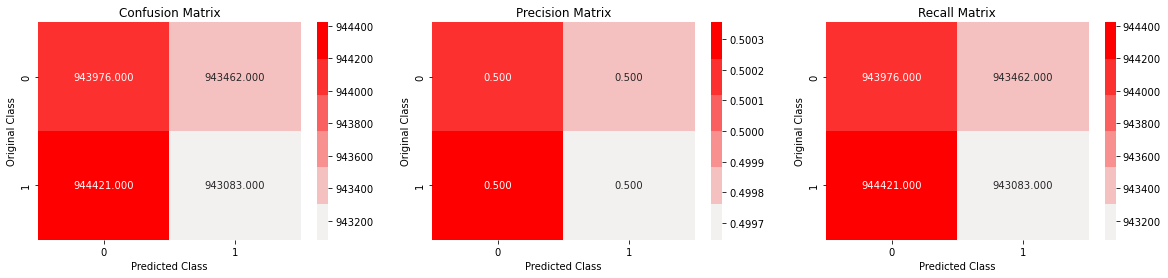

F1 score for random model 0.49977252547595435


In [6]:
Confusion_matrix(df_test['indicator_link'],random_model_predict)
print('F1 score for random model',f1_score(df_test['indicator_link'],random_model_predict))

### Train and Test split

In [7]:
Y_train=df_train['indicator_link']
df_train=df_train.drop(["indicator_link"],axis=1)
df_train.head()

,source_node,destination_node,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,page_rank_s,page_rank_d,...,cosine_for_followees,cosine_for_followers,same_coummunity,Adar_index,follows_back,shortest_path,eigenvector_centrality_s,eigenvector_centrality_d,clustering_coefficient_s,clustering_coefficient_d
0,1443525,1177229,37,11,0,0,0,0,1.850118e-06,1.756390e-06,...,0,0,1,0.480126,1,2,2.632796e-07,1.424547e-08,0.036225,0.015929
1,582845,818904,4,2,0,0,0,0,7.622485e-07,1.222512e-06,...,0,0,1,0.000000,1,9,4.103598e-12,1.147427e-10,0.000000,0.134494
2,764111,1729045,20,23,0,0,0,0,2.882923e-06,8.497469e-07,...,0,0,1,0.000000,1,5,1.975490e-09,3.854421e-10,0.031532,0.020073
3,499479,828225,0,2,0,0,0,0,1.655959e-07,6.110965e-07,...,0,0,1,0.000000,0,8,6.744329e-23,1.576278e-12,0.000000,0.147059
4,182676,1647409,10,22,0,0,0,0,4.898329e-07,3.031131e-07,...,0,0,1,15.468246,1,2,3.399486e-13,1.819383e-13,0.310591,0.387500


In [8]:
Y_test=df_test['indicator_link']
df_test=df_test.drop(["indicator_link"],axis=1)
df_test.head()

,source_node,destination_node,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,page_rank_s,page_rank_d,...,cosine_for_followees,cosine_for_followers,same_coummunity,Adar_index,follows_back,shortest_path,eigenvector_centrality_s,eigenvector_centrality_d,clustering_coefficient_s,clustering_coefficient_d
0,925781,744483,8,8,0,0,0,0,1.233243e-06,5.633643e-07,...,0,0,1,0.000000,1,-1,1.162253e-11,2.793157e-13,0.094828,0.111111
1,1047516,1767158,23,18,0,0,0,0,1.393932e-06,1.666371e-06,...,0,0,1,1.285097,1,2,6.548818e-08,1.470550e-07,0.179280,0.037827
2,1123446,798286,11,15,0,0,0,0,1.119169e-06,1.784965e-07,...,0,0,1,0.000000,1,-1,1.012897e-10,2.887322e-09,0.030063,0.000000
3,1093801,936448,2,2,0,0,0,0,6.863109e-07,1.655959e-07,...,0,0,1,0.000000,1,-1,1.110120e-13,6.744329e-23,0.000000,0.000000
4,1667658,649427,48,19,0,0,0,0,9.345963e-07,8.432756e-07,...,0,0,1,3.111279,0,2,4.386665e-07,4.731431e-07,0.468651,0.508502


## Logistic Regression

In [9]:
alpha=[10**x for x in range(-5,2)]
f1_score_alpha=[]
for i in tqdm(alpha):
    clf=SGDClassifier(alpha=i,loss='log',penalty='l2',n_jobs=-1,random_state=15)
    clf.fit(df_train,Y_train)
    predict=clf.predict(df_test)
    f1_score_alpha.append(f1_score(predict,Y_test))
    print('For alpha value ',i,' f1 score ',f1_score_alpha[-1])
    

 14%|█▍        | 1/7 [1:23:19<8:19:59, 4999.90s/it]

For alpha value  1e-05  f1 score  0.6784822426597952


 29%|██▊       | 2/7 [2:52:39<7:14:18, 5211.72s/it]

For alpha value  0.0001  f1 score  0.6299474358491276


 43%|████▎     | 3/7 [4:17:54<5:44:28, 5167.15s/it]

For alpha value  0.001  f1 score  0.5184406658046178


 57%|█████▋    | 4/7 [5:41:22<4:15:13, 5104.53s/it]

For alpha value  0.01  f1 score  0.5597029411269318


 71%|███████▏  | 5/7 [7:26:57<3:04:56, 5548.16s/it]

For alpha value  0.1  f1 score  0.6666739662237718


 86%|████████▌ | 6/7 [8:48:24<1:28:43, 5323.59s/it]

For alpha value  1  f1 score  0.6552212741633131


100%|██████████| 7/7 [10:10:22<00:00, 5231.72s/it] 

For alpha value  10  f1 score  0.666680677440952


[]

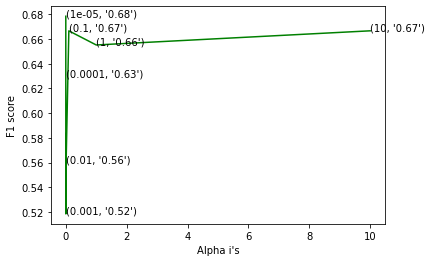

In [11]:
fig,ax=plt.subplots()
ax.plot(alpha,f1_score_alpha,c='g')
for i,text in enumerate(np.round(f1_score_alpha,2)):
    ax.annotate((alpha[i],str(text)),(alpha[i],f1_score_alpha[i]))
plt.xlabel("Alpha i's")
plt.ylabel('F1 score')
plt.plot()

In [12]:
best_alpha_logisticRegression=np.argmax(f1_score_alpha)

## Linear SVM

In [13]:
alpha=[10**x for x in range(-5,2)]
f1_score_alpha=[]
for i in tqdm(alpha):
    clf=SGDClassifier(alpha=i,loss='hinge',penalty='l2',n_jobs=-1,random_state=15)
    clf.fit(df_train,Y_train)
    predict=clf.predict(df_test)
    f1_score_alpha.append(f1_score(predict,Y_test))
    print('For alpha value ',i,' f1 score ',f1_score_alpha[-1])
    

 14%|█▍        | 1/7 [1:13:18<7:19:50, 4398.39s/it]

For alpha value  1e-05  f1 score  0.27110697254032384


 29%|██▊       | 2/7 [2:26:51<6:07:14, 4406.84s/it]

For alpha value  0.0001  f1 score  0.4636818173429508


 43%|████▎     | 3/7 [3:50:23<5:12:13, 4683.29s/it]

For alpha value  0.001  f1 score  0.7046858054554235


 57%|█████▋    | 4/7 [5:03:07<3:47:52, 4557.37s/it]

For alpha value  0.01  f1 score  0.6537674824462479


 71%|███████▏  | 5/7 [14:36:29<8:30:39, 15319.58s/it]

For alpha value  0.1  f1 score  0.6666742016920254


 86%|████████▌ | 6/7 [15:46:56<3:12:27, 11548.00s/it]

For alpha value  1  f1 score  0.24711171121445663


100%|██████████| 7/7 [16:58:58<00:00, 8734.08s/it]   

For alpha value  10  f1 score  0.3929013964652329


[]

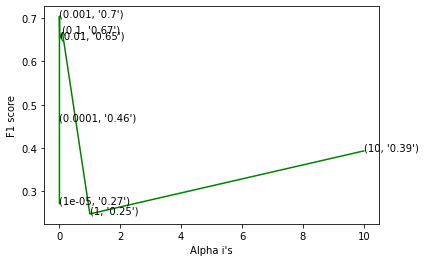

In [15]:
fig,ax=plt.subplots()
ax.plot(alpha,f1_score_alpha,c='g')
for i,text in enumerate(np.round(f1_score_alpha,2)):
    ax.annotate((alpha[i],str(text)),(alpha[i],f1_score_alpha[i]))
plt.xlabel("Alpha i's")
plt.ylabel('F1 score')
plt.plot()

In [16]:
best_alpha_SVM=np.argmax(f1_score_alpha)

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
f1_score_max_depth=[]
max_depth=[x for x in range(5,25,5)]
for i in tqdm(max_depth):
    clf=RandomForestClassifier(max_depth=i,random_state=15)
    clf.fit(df_train,Y_train)
    predict=clf.predict(df_test)
    f1_score_max_depth.append(f1_score(predict,Y_test))
    print('For max depth ',i,' f1 score ',f1_score_max_depth[-1])

 25%|██▌       | 1/4 [48:25<2:25:15, 2905.13s/it]

For max depth  5  f1 score  0.8962005443610418


 50%|█████     | 2/4 [2:01:06<2:05:23, 3761.58s/it]

For max depth  10  f1 score  0.9134717263602226


 75%|███████▌  | 3/4 [3:34:06<1:16:31, 4591.99s/it]

For max depth  15  f1 score  0.9125715444858542


100%|██████████| 4/4 [5:18:41<00:00, 4780.35s/it]  

For max depth  20  f1 score  0.9099945079969304


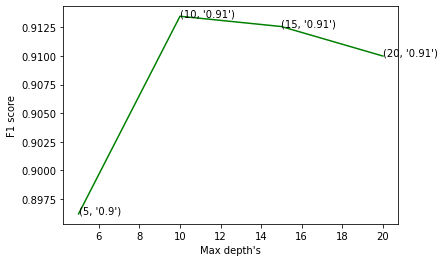

In [22]:
fig,ax=plt.subplots()
ax.plot(max_depth,f1_score_max_depth,c='g')
for i,text in enumerate(np.round(f1_score_max_depth,2)):
    ax.annotate((max_depth[i],str(text)),(max_depth[i],f1_score_max_depth[i]))
plt.xlabel("Max depth's")
plt.ylabel('F1 score')
plt.plot()
best_max_depth=np.argmax(f1_score_max_depth)

In [25]:
print('*'*30,'Logistic Regression','*'*30)
clf=SGDClassifier(alpha=alpha[best_alpha_logisticRegression],loss='log',penalty='l2',n_jobs=-1,random_state=15)
clf.fit(df_train,Y_train)
predict=clf.predict(df_test)
predict_train=clf.predict(df_train)
print('F1 score on test data ',f1_score(predict,Y_test),'F1 score on train data',f1_score(predict_train,Y_train))
print()
print('*'*35,'SVM','*'*35)
clf=SGDClassifier(alpha=alpha[best_alpha_SVM],loss='hinge',penalty='l2',n_jobs=-1,random_state=15)
clf.fit(df_train,Y_train)
predict=clf.predict(df_test)
predict_train=clf.predict(df_train)
print('F1 score on test data ',f1_score(predict,Y_test),'F1 score on train data',f1_score(predict_train,Y_train))
print()
print('*'*30,'RANDOM FOREST','*'*30)
clf=RandomForestClassifier(max_depth=max_depth[best_max_depth],random_state=15)
clf.fit(df_train,Y_train)
predict=clf.predict(df_test)
predict=clf.predict(df_test)
predict_train=clf.predict(df_train)
print('F1 score on test data ',f1_score(predict,Y_test),'F1 score on train data',f1_score(predict_train,Y_train))


******************** Logistic Regression ********************
F1 score on test data  0.5436062024853072 F1 score on train data 0.5612336648909076
******************** SVM ********************
F1 score on test data  0.5881972999670728 F1 score on train data 0.5955268742769626
******************** RANDOM FOREST ********************
F1 score on test data  0.9068301027918593 F1 score on train data 0.9353618220388029
